# Project Group 2 

Members: Jelmer Nederhof, Yvain Redon, Martin Kooistra, Chenhao Zhang and Suze Vernooij

Student numbers: 5407400, 6071392, 4880005, 5704057 and 5091292

# Research Objective

Main objective: 
* “What is the relationship between the COVID-19 pandemic and the use of public transport for different socio-demographic groups in the Netherlands between 2010 and 2022?” 

Sub objectives:
1. How did the COVID-19 pandemic impact overall public transport ridership in the Netherlands between 2020 and 2022?
2. What were the key socio-demographic factors which were impacted the most during the pandemic?
3. How did the key socio-demographic factors changed during the pandemic?


# 1. Introduction

In 2020, the COVID-19 pandemic set foot in the Netherlands resulting in infections all over the country. To decrease the infections, the Dutch government took several measurements. These sets of policies changed the behavioral patterns of Dutch citizens (Van der Werf et al., 2021). A new trend was to work from home resulting in less commuting and less mobility. Policies and trends like these effected the use public transport (Van der Drift et al., 2022). In this report, the following research question will be discussed: 

“What is the relationship between the COVID-19 pandemic and the use of public transport for different socio-demographic groups in the Netherlands between 2010 and 2022?”

To reveal this relationship, datasets from CBS about the use of public transport are analyzed. The datasets are based on a survey in which Dutch citizens were asked about their social-demographic characteristics and if they used public transport that particular day. One dataset has data from 2010 to 2017 and the other one from 2018 to 2022. First step is to merge this data together to one dataset by setting the same language, changing variable names and sorting the years. 

Using Python, the merged dataset is analyzed to get to know patterns and to see if these socio-demographic characteristics influenced these patterns. The dataset is used to find general patterns before the pandemic. Graphs will specify the trend over the years. In the dataset the percentage of public transport use is mentioned. The following sub questions have been formulated to specify the research question better:

1. How did the COVID-19 pandemic impact overall public transport ridership in the Netherlands between 2020 and 2022?
2. What were the key socio-demographic factors which were impacted the most during the pandemic?
3. How did the key socio-demographic factors changed during the pandemic?

First, the process of data import and processing is shown in part 3 and 4. \
Then, the three subquestions are answered, starting with subquestion one, in part 5. \
Finally, the findings are discussed and summarized in the conclusion.  

In [1]:
# Imports 
import pandas as pd
import plotly.express as px
import numpy as np
import copy
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# 3. Data Import

In this chapter the two datasets are imported. These datasets are processed so they are in the same format and they can be merged. This merged dataset is filtered so the relevant information is shown.

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
# read dataset 1
df1 = pd.read_csv('Project_dataset_1.csv')
df1.columns.values[0] = 'Personal characteristics'

In [ ]:
# read dataset 2
df2 = pd.read_csv('Personenmobiliteit__aandeel_verkeersdeelnemers__persoonskenmerken_2010_2017_gescheiden_door_lijstscheidingsteken.csv', sep=";")

In [ ]:
# translate dataset 2 from dutch to english
df2 = df2.replace({'Actueel onderwijsniveau: laag': 'Level of educ: 1. Low'})
df2 = df2.replace({'Actueel onderwijsniveau: middelbaar': 'Level of educ: 2 Intermediate'})
df2 = df2.replace({'Actueel onderwijsniveau: hoog': 'Level of educ: 3 High'})
df2 = df2.replace({'Migratieachtergrond: westers': 'Background: western'})
df2 = df2.replace({'Migratieachtergrond: niet-westers': 'Background: non-western'})
df2 = df2.replace({'Migratieachtergrond: Nederland': 'Background: Dutch'})
df2 = df2.replace({'Leeftijd: 0 tot 12 jaar': 'Age: 6 to 11 years'})
df2 = df2.replace({'Leeftijd: 12 jaar of ouder': 'Age: 12 years or older'})
df2 = df2.replace({'Leeftijd: 12 tot 18 jaar': 'Age: 12 to 17 years'})
df2 = df2.replace({'Leeftijd: 18 tot 25 jaar': 'Age: 18 to 24 years'})
df2 = df2.replace({'Leeftijd: 25 tot 35 jaar': 'Age: 25 to 34 years'})
df2 = df2.replace({'Leeftijd: 35 tot 50 jaar': 'Age: 35 to 49 years'})
df2 = df2.replace({'Leeftijd: 50 tot 65 jaar': 'Age: 50 to 64 years'})
df2 = df2.replace({'Leeftijd: 65 tot 75 jaar': 'Age: 65 to 74 years'})
df2 = df2.replace({'Leeftijd: 75 jaar of ouder': 'Age: 75 years or older'})
df2 = df2.replace({'Categorie: arbeidsongeschikte': 'Particip.: claiming disability benefit'})
df2 = df2.replace({'Categorie: werkzaam 12 tot 30 uur pw': 'Participation: working 12 -29 h. a week'})
df2 = df2.replace({'Categorie: werkzaam >= 30 uur pw': 'Participation: working >30 hours a week'})
df2 = df2.replace({'Categorie: scholier/student': 'Participation:student/scholier'})
df2 = df2.replace({'Participatie:student/scholier': 'Participation:student/scholier'})
df2 = df2.replace({'Categorie: werkloos': 'Participation: unemployed'})
df2 = df2.replace({'Categorie: overig': 'Participation: unemployed, other'})
df2 = df2.replace({'Categorie: gepensioneerd/VUT': 'Participation: retired'})
df2 = df2.replace({'Studenten met OV-weekkaart': 'Students with week pass publ. transp.'})
df2 = df2.replace({'Studenten met OV-weekendkaart': 'Students with weekend pass publ. transp.'})
df2 = df2.replace({'Personen zonder studenten-OV-kaart': 'Persons without student publ.transp.card'})                   
df2 = df2.replace({'Besteedbaar inkomen: 1e 20%-groep': 'Equivalised income: 1th 20%-group'})
df2 = df2.replace({'Besteedbaar inkomen: 2e 20%-groep': 'Equivalised income: 2nd 20%-group'})
df2 = df2.replace({'Besteedbaar inkomen: 3e 20%-groep': 'Equivalised income: 3rd 20%-group'})
df2 = df2.replace({'Besteedbaar inkomen: 4e 20%-groep': 'Equivalised income: 4th 20%-group'})
df2 = df2.replace({'Besteedbaar inkomen: 5e 20%-groep': 'Equivalised income: 5th 20%-group'})
df2 = df2.replace({'Bezit rijbewijs: geen auto beschikbaar': 'Drivers license, no passenger car in hh'})
df2 = df2.replace({'Bezit rijbewijs: soms auto beschikbaar': 'Drivers license, passenger car in hh'})
df2 = df2.replace({'Bezit rijbewijs: bezit auto': 'Drivers license, passenger car, in own name'})
df2 = df2.replace({'Hoogte inkomen: tot 10 000 euro': 'Income level: up to 10 000 euros'})
df2 = df2.replace({'Hoogte inkomen: 10 000 tot 20 000 euro': 'Income level: 10 000 to 20 000 euros'})
df2 = df2.replace({'Hoogte inkomen: 20 000 tot 30 000 euro': 'Income level: 20 000 to 30 000 euros'})
df2 = df2.replace({'Hoogte inkomen: 30 000 tot 40 000 euro': 'Income level: 30 000 to 40 000 euros'})
df2 = df2.replace({'Hoogte inkomen: 40 000 tot 50 000 euro': 'Income level: 40 000 to 50 000 euros'})
df2 = df2.replace({'Hoogte inkomen: 50 000 euro of meer': 'Income level: 50 000 euros or more'})


In [ ]:
df2 = df2.replace({'Persoonskenmerken': 'Personal characteristics'})
df2 = df2.replace({'Perioden': 'Periods'})
df2 = df2.replace({'Geslacht': 'Sex'})
df2 = df2.replace({'Onderwerp': 'Topic'})
df2 = df2.replace({'Verkeersdeelname': 'Traffic participation'})
df2 = df2.replace({'Totaal mannen en vrouwen': 'Total male and female'})
df2 = df2.replace({'Gebruik van het openbaar vervoer': 'Use of public transport'})
df2 = df2.replace({'Mannen': 'Male'})
df2 = df2.replace({'Vrouwen': 'Female'})
df2 = df2.replace({'Totaal personen': 'Total persons'})

In [ ]:
# remove unnecessary rows
df2.columns = df2.iloc[2]
df2 = df2.drop(index=[0, 1, 2])

In [ ]:
# rename columns of dataset 2 so they match the column names of dataset 1
df2.columns.values[0] = 'Personal characteristics'
df2.columns.values[3] = 'Traffic participation.1'
df2.columns.values[4] = 'Traffic participation.2'
df2.columns.values[6] = 'Use of public transport.1'
df2.columns.values[7] = 'Use of public transport.2'
df2 = df2[df2['Personal characteristics'] != "Categorie: baby's/kleuters"]

In [ ]:
# merge dataset 1 and 2 to have the data from 2010 to 2022 combined
df2.reset_index(drop=True, inplace=True)
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

In [ ]:
# sort the merged dataset so the same sociodemographic groups of the two data sets are underneath each other
merged_df = merged_df.sort_values(by=['Personal characteristics', 'Topic'])

# drop unnecessary columns
columns_to_drop = ['Traffic participation.1', 'Traffic participation.2', 'Use of public transport.1', 'Use of public transport.2' ]
merged_df = merged_df.drop(columns_to_drop, axis=1)
merged_df = merged_df.drop([0, 1, 137, 138, 139, 460])

In [ ]:
#
merged_df['Traffic participation'] = merged_df['Traffic participation'].str.replace(',','.', regex = False)
merged_df['Use of public transport'] = merged_df['Use of public transport'].str.replace(',','.', regex = False)

for row in range(merged_df.shape[0]):
    for column in range(2,merged_df.shape[1]):
        merged_df.iloc[row,column] = pd.to_numeric(merged_df.iloc[row,column], errors='coerce')
        merged_df

In [ ]:
# show full merged dataset
pd.set_option('display.max_rows', None)
merged_df

In [ ]:
# save merged dataset to csv
merged_df.to_csv('Project_datasets_merged_filtered.csv', index=False)

In [ ]:
# Reset display options for dataframes
pd.set_option('display.max_rows', 10)

# 4. Data Processing

##### Functions definition

In [2]:
# Function to convert dataframe columns into dictionnary format
def dictionary(df):
    d = {}
    demographic_group = df['Personal characteristics'].unique()
    for i in range(len(demographic_group)):
        d[demographic_group[i]] = df[df['Personal characteristics']==demographic_group[i]]
    return d


In [3]:
# Function to make basic graphs using dictionaries
def dict_draw(dictionary, group, sex):
    fig = px.line()
    for i in range(len(group)):
        fig.add_scatter(x=dictionary[group[i]]['Topic datetime'], y=dictionary[group[i]][sex], mode='lines', name=group[i])

    fig.update_layout(xaxis_title='year',
                      yaxis_title=sex)
    
    fig.show()

In [4]:
# Function used to select only years between a certain start
# and end date
def filter_by_year(data_frame, s, e):
    # Convert the 'Date' column to datetime
    data_frame['Topic datetime'] = pd.to_datetime(data_frame['Topic datetime'])
    
    # Create a boolean mask to select rows in the desired date range (s-e)
    mask = (data_frame['Topic datetime'].dt.year >= s) & (data_frame['Topic datetime'].dt.year <= e)
    
    # Apply the mask to filter the DataFrame
    return data_frame[mask]

# Function that creates averages columns for three periods :
# Before the pandemic, during the pandemic and after the pandemic
def get_average(df, data_type):
    average_line_before = pd.concat([filter_by_year(df, 2010, 2019) for df in list(d.values())]).groupby('Personal characteristics')\
        [data_type].mean().reset_index().rename(columns={data_type: 'Before'})
    average_line_during = pd.concat([filter_by_year(df, 2020, 2021) for df in list(d.values())]).groupby('Personal characteristics')\
        [data_type].mean().reset_index().rename(columns={data_type: 'During'})
    average_line_after = pd.concat([filter_by_year(df, 2022, 2022) for df in list(d.values())]).groupby('Personal characteristics')\
        [data_type].mean().reset_index().rename(columns={data_type: 'After'})
    average_line = pd.concat([average_line_before, average_line_during, average_line_after], axis=1)
    average_line = pd.merge(average_line_before, average_line_during, on='Personal characteristics', how='outer')
    average_line = pd.merge(average_line, average_line_after, on='Personal characteristics', how='outer')
    return average_line

In [5]:
# Function used to draw a bar plot representing the average participation
# One bar represents the levels before the pandemic, another the levels during pandemic
# and the last one the levels after the pandemic
def draw_bar(df):
    fig = make_subplots(rows=1, cols=1)

    # Add bar traces, one for each data column
    fig.add_trace(go.Bar(x=df['Personal characteristics'], y=df['Before'], name='Before'), row=1, col=1)
    fig.add_trace(go.Bar(x=df['Personal characteristics'], y=df['During'], name='During'), row=1, col=1)
    fig.add_trace(go.Bar(x=df['Personal characteristics'], y=df['After'], name='After'), row=1, col=1)

    # Change the bar mode to group
    fig.update_layout(barmode='group')

    # Show the figure
    fig.show()


In [6]:
# Function to calculate the difference between each period
# Calculates the 'drop' between before and during covid and
# the 'increase' between during covid and after covid 
def get_diff(data):
    df = copy.deepcopy(data)
    df['drop'] = df['During'] - df['Before']
    df['increace'] = df['After'] - df['During']
    return df

##### Reading the dataset and modifying it

In [7]:
# Reading the new merged dataset
df = pd.read_csv('Project_datasets_merged_filtered.csv', index_col=None)

# Changing the format of the columns that contains the years
df['Topic'] = pd.to_numeric(df['Topic'])
# Creating a column for the year in datetime format
df['Topic datetime'] = pd.to_datetime(df['Topic'], format = '%Y')


In [8]:
# Creation of a new column indicating the gap between the public transport
# paritcipation of a certain group and the mean value for that year

df['gap with mean']=0
for i in range(0, df.shape[0]):
    ref_year = df.loc[i, 'Topic']
    ref_value = df[(df['Personal characteristics'] == 'Total persons') & (df['Topic'] == ref_year)].iloc[0, 3]
    df.loc[i, 'gap with mean'] = df.loc[i, 'Use of public transport'] - ref_value

df

,Personal characteristics,Topic,Traffic participation,Use of public transport,Topic datetime,gap with mean
0,Age: 12 to 17 years,2010,82.1,10.0,2010-01-01,3.2
1,Age: 12 to 17 years,2011,82.8,9.8,2011-01-01,2.7
2,Age: 12 to 17 years,2012,82.1,8.9,2012-01-01,2.2
3,Age: 12 to 17 years,2013,82.0,9.8,2013-01-01,2.8
4,Age: 12 to 17 years,2014,83.3,8.9,2014-01-01,2.2
...,...,...,...,...,...,...
450,Total persons,2018,82.9,8.6,2018-01-01,0.0
451,Total persons,2019,81.9,8.6,2019-01-01,0.0
452,Total persons,2020,73.8,3.9,2020-01-01,0.0
453,Total persons,2021,78.1,4.2,2021-01-01,0.0


In [9]:
# Creation of a column to compare in percentages the level of public transport participation
# of a certain year and for a certain group to the participation level 
# of 2018 for the same group 

df['comparison to 2018 level (%)']=0
for i in range( df.shape[0]):
    ref_group = df.loc[i, 'Personal characteristics']
    if df[(df['Personal characteristics'] == ref_group) & (df['Topic'] == 2018)].shape[0] == 0:
        df.loc[i, 'comparison to 2018 level (%)'] = 'NaN'
    else:
        ref_value = df[(df['Personal characteristics'] == ref_group) & (df['Topic'] == 2018)].iloc[0, 3]
        comparison_value = df.loc[i, 'Use of public transport']
        df.loc[i, 'comparison to 2018 level (%)'] = ((comparison_value - ref_value)/ref_value)*100

In [10]:
# Creation of a column to compare in percentages the level of public transport participation
# of a certain year and for a certain group to the participation level 
# of 2020 for the same group 

df['comparison to 2020 level (%)']=0
for i in range( df.shape[0]):
    ref_group = df.loc[i, 'Personal characteristics']
    if df[(df['Personal characteristics'] == ref_group) & (df['Topic'] == 2020)].shape[0] == 0:
        df.loc[i, 'comparison to 2020 level (%)'] = 'NaN'
    else:
        ref_value = df[(df['Personal characteristics'] == ref_group) & (df['Topic'] == 2020)].iloc[0, 3]
        comparison_value = df.loc[i, 'Use of public transport']
        df.loc[i, 'comparison to 2020 level (%)'] = ((comparison_value - ref_value)/ref_value)*100

In [11]:
d = dictionary(df)

# 5. Data Visualisation

In part 5 the processed data will be used make visualisations and analysis. The three subquestions will be answered on the basis of different graphs and other visualisations. These visualisations will be used to make an analysis. 

## 5.1 General impact COVID-19 on public transport use

In this section the following question will be answered. How did the COVID-19 pandemic impact overall public transport use in the Netherlands between 2020 and 2022? The analysis aims to understand the changes in overall public transport use during the COVID-19 pandemic, focusing on the years 2020 to 2022. The dataset provides information on traffic participation and the use of public transport for different socio-demographic groups.

The dataset is filtered to include data from the years 2010 to 2022, capturing the period directly impacted by the COVID-19 pandemic. Descriptive statistics, including mean and interquartile range, were calculated for the overall public transport ridership during the pandemic years. In the graph the mean percentage of public transport use across the year is visible. 

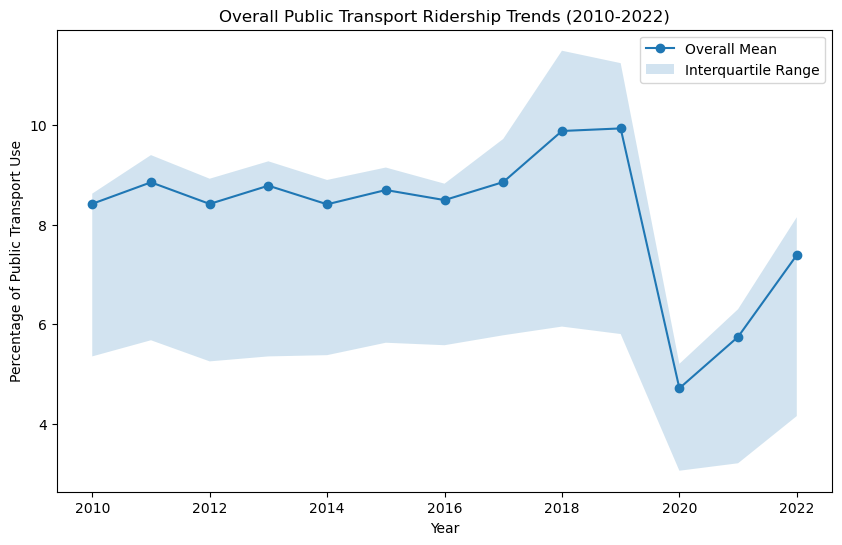

In [12]:
# Descriptive Analysis for overall public transport use
overall_stats = df.groupby('Topic')['Use of public transport'].describe()

# Plot overall trends
plt.figure(figsize=(10, 6))
plt.plot(overall_stats.index, overall_stats['mean'], marker='o', label='Overall Mean')
plt.fill_between(overall_stats.index, overall_stats['25%'], overall_stats['75%'], alpha=0.2, label='Interquartile Range')
plt.title('Overall Public Transport Ridership Trends (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage of Public Transport Use')
plt.legend()
plt.show()

The analysis shows fluctuations in overall public transport use during the pandemic years. \
This indicates that the changing conditions caused by the pandemic have a direct effect on the use of public transport. \
From 2019 to 2020 a drop in the Public Transport use is shown. This is the period where the most COVID-19 measurements were introduced.

The visualization provides a clear impression of how public transport patterns evolved during the pandemic. \
The analysis indicates that the COVID-19 pandemic had a noticeable impact on overall public transport use in the Netherlands between 2020 and 2022. 

An important question is: if COVID would not have happened, how high would public transport ridership be? \
To answer this question a trend analysis is performed.


### 5.1.1 Trend


In [13]:
# First we create a series named mask to indicate which values contain info about the general population
mask = df['Personal characteristics'].str.startswith('Total persons')
# Then the dataframe is made with this info 
df_total = df[mask]
# Lastly the dataframe is plotted
fig = px.line(df_total, y='Use of public transport', x='Topic', color='Personal characteristics')
fig.show()

In [14]:
# First the y and x values are seperated,the trend is calculated based on pre-COVID data
y=np.array(df_total['Use of public transport']).astype(float)
y=y[0:-3]
print(y)

x=np.array(df_total.Topic[0:-3].astype(float)) 
print(x)

[6.8 7.1 6.7 7.  6.7 6.9 6.8 7.  8.6 8.6]
[2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]


In [15]:
# The fit is calculated. A linear relationship is assumed
z = np.polyfit(x,y,1)
z

array([ 1.68484848e-01, -3.32192727e+02])

In [16]:
fit_total_x1 = z[0]
fit_total_x0 = z[1]
# Now we create the datapoints according to the trend to compare it with the real data
y_fit = []
for i in range(2010,2023):
    y_fit.append(fit_total_x1*i + fit_total_x0)
y_fit

[6.461818181817989,
 6.630303030302855,
 6.798787878787721,
 6.9672727272725865,
 7.135757575757452,
 7.304242424242261,
 7.472727272727127,
 7.641212121211993,
 7.809696969696859,
 7.978181818181724,
 8.14666666666659,
 8.315151515151399,
 8.483636363636265]

In [17]:
# The other x and y values are extracted seperated so they can be plotted
x_fit=np.array(df_total.Topic.astype(float))
y_norm=np.array(df_total['Use of public transport']).astype(float) 
x_norm=np.array(df_total.Topic.astype(float))

# Here we create the figure to compare the trend with the real data
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='y_fit'))
fig.add_trace(go.Scatter(x=x_norm, y=y_norm, mode='lines', name='y_norm'))


# And a label is made for easy readability 
fig.update_layout(
    title="Comparison of the prognosed trend versus the COVID data",
    xaxis_title="Year",
    yaxis_title="Use of public transport"
)

fig.show()

The trend before 2018 was stable. In 2018 a sudden increase occured. 

This is most likely due to the sudden increase in 2018 as compared to 2017. \
In this year a new dataset was initiated. Possibly a new method of measuring was introduced. 

The new measuring method can explain the sudden increase in PT usage in 2018. \
Because of this, in the remainder of the notebook the pre and after COVID situation will be compared to investigate the effect of COVID.


## 5.2 Key socio-demographic factors impacted by COVID-19 

What were the key socio-demographic factors which were impacted the most during the pandemic? This is the question that will be answered in this section. An analysis focused on key socio-demographic factors will be done. To understand their impact on the public transport and traffic participation.

The data is grouped based on each socio-demographic factor to be able to notice trends within different segments of the population. The impact of COVID-19 is analysed by comparing the equilibrium that results from the pandemic with the before COVID-19 equilibrium. Bar charts and a line graph are used to visually represent the changes in public transport usage for distinct socio-demographic factors during the pandemic years.

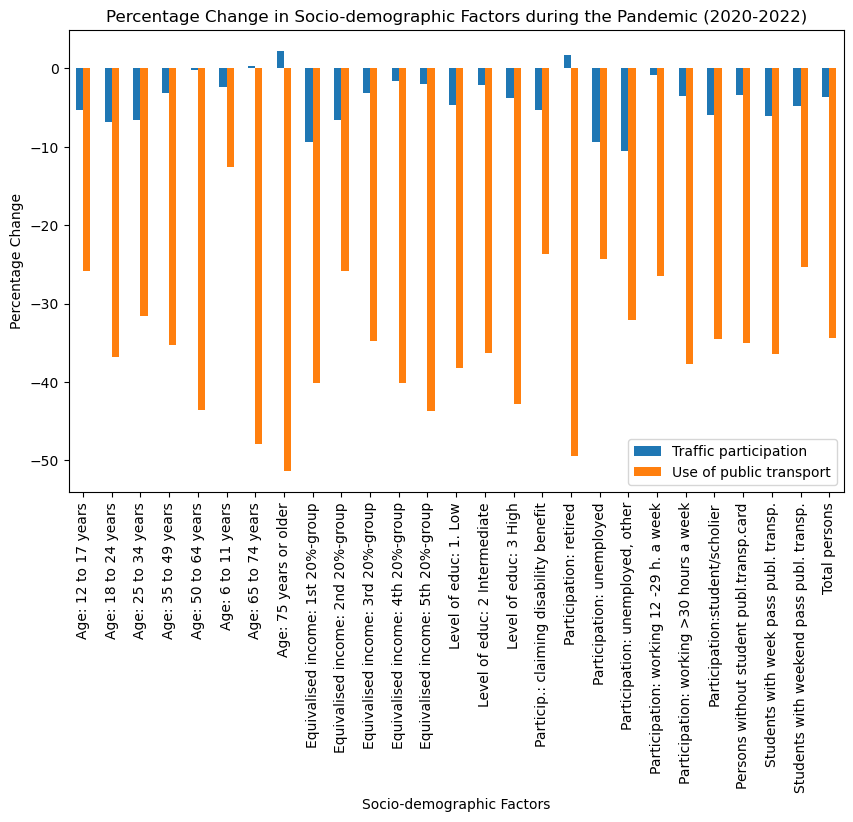

In [18]:
# Assuming data is your DataFrame with the given dataset

# Exclude specific socio-demographic factors
excluded_factors = ['Income level', 'Background', 'Drivers licence']

# Filter data for pandemic years, excluding specific factors
pandemic_years = df.loc[
    (df['Topic datetime'].between('2020', '2022')) &
    (~df['Personal characteristics'].isin(excluded_factors))
]

# Group by socio-demographic factors and calculate the mean
grouped_data = pandemic_years.groupby('Personal characteristics').mean(['Traffic participation', 'Use of public transport'])

# Calculate percentage change from pre-pandemic years (2010-2019)
pre_pandemic_mean = df.loc[
    (df['Topic datetime'].between('2010', '2019')) &
    (~df['Personal characteristics'].isin(excluded_factors))
].groupby('Personal characteristics').mean(['Traffic participation', 'Use of public transport'])


percentage_change = ((grouped_data - pre_pandemic_mean) / pre_pandemic_mean) * 100
percentage_change = percentage_change.drop('Topic', axis=1)
percentage_change = percentage_change.drop('gap with mean', axis=1)

# Exclude specific factors from the x-axis
factors_to_plot = grouped_data.index.difference(excluded_factors)

# Plotting changes
percentage_change.loc[factors_to_plot].plot(kind='bar', figsize=(10, 6))
plt.title('Percentage Change in Socio-demographic Factors during the Pandemic (2020-2022)')
plt.xlabel('Socio-demographic Factors')
plt.ylabel('Percentage Change')
plt.show()


The visualisation gives insights into which groups have different traffic participation and public transport usage during and after the pandemic. \
This chart shows that the impact of the pandamic isn't uniform for every socio-demographic group. 

Noticable is that people who are 75 years or older and retired people have the largest percentual decrease in public transport usage during the pandamic. \
Remarkable is that their traffic participation slightly increases. The same is true for retired people, a group that represents thesame people. \
No other socio-demographic group has an increase in traffic participation in this period. People within the age of 6 and 11 years have the smallest percentual decrease in public transport use.

Several sociodemografic groups, such as people above 65 and retired people represent more or less the same population. \
To distinguish between population groups within the analysis, several stereotypical groups are identified: 
1. Young students: 
    1. Age: 6 to 24 years
    2. Participation: student/scholar  
    3. Level of education: majority High
    4. Equivalised income: 1st 20%-group
    5. No passenger car in hh
2. Blue collar workers:
    1. Age: 25 to 64 years
    2. Participation: working >30 hours a week
    3. Level of education: Low or Intermediate 
    4. Equivalised income: 1st, 2nd or 3rd 20%-group 
    5. Drivers license
3. White collar workers:
    1. Age: 25 to 64 years
    2. Participation: working >12 hours a week  
    3. Level of education: High or Intermediate
    4. Equivalised income: 3rd, 4th or 5th 20%-group
    5. Passenger car in hh
4. Unemployed adults:
    1. Age: 25 to 64 years
    2. Participation: unemployed or claiming disability benefit 
    3. Level of education: Low or Intermediate
    4. Equivalised income: 1st 20%-group 
    5. No passenger car in hh
5. Seniors:
    1. Age: 65 years or older 
    2. Participation: retired  
    3. Level of education: any
    4. Equivalised income: any
    5. Drivers license

The analysis of socio-demographic factors provided a nuanced understanding of the differential impact of the pandemic on public transport use across various socio-demographic groups. \
In the next section a more in dept analysis of the impact of the pandamic on the socio-demographic factors will be done.

## 5.3 Impact COVID-19 key socio-demographic factors per group

3. How did the key socio-demographic factors changed during the pandemic?

### 5.3.1 Age

#### Introduction
In this part, the main focus is the differences in public transport use between different age groups, and how the covid pandemic may have affected these differences.  
Indeed, different age groups may have been affected differently by the covid pandemic, depending on different other factors.    
Of course, factors linked to age are not independent from other factors studied in this project : for example older people are less likely to be employed than people between 25 and 34 years old.  


In [19]:
# Creation of a dataset only containing the public transport participation
# for the "Total persons" group, i.e all categories regrouped

mask = df['Personal characteristics'].str.startswith('Total')
df_total = df[mask]

In [20]:
# Creation of a dataset focusing on age groups, with one dataset also having the total group for comparison
# The dataset df_age2 also contains the value across all groups for comparison

mask = df['Personal characteristics'].str.startswith('Age')
df_age = df[mask]
df_age2 = pd.concat([df_total, df_age])

In [21]:
# Plot of the use of public transports for different age groups
# across the years

fig = px.line(data_frame=df_age2, x="Topic", y="Use of public transport", color='Personal characteristics', title = 'Use of public transport depending on age across the years')

# Highlighting the plot for the "Total persons" demographic group
fig.update_traces(line_width = 3, selector=('Personal characteristics'=='Total persons'))
fig.update_traces(opacity = 0.85)
fig.update_traces(opacity = 1, selector=('Personal characteristics'=='Total persons'))
fig.update_traces(line_dash = 'longdashdot', selector=('Personal characteristics'=='Total persons'))
fig.show()

The drop of traffic during covid is sharper for younger categories (age < 35 years) compared to the other age groups. Maybe this can be explained by the closing of schools and universities. Maybe younger workers also tend to use remote working more than older ones.  
Since older age groups, seniors, tended to use public transport less before covid, the decrease in participation in these groups is also less important, but maybe the decrease relative to their pre-covid levels is more important.  
  
It is noticeable that people between 25 and 34 years old used public transport more than people 12 to 17 years old before the pandemic, whereas after the pandemic their levels of use of public transport are quite similar. This can maybe be explained by an increase in the use of remote working.  Students do not have this privelege.
Looking at the older data from 2010, the general trend seems to be a stagnation from 2010 to 2017, with a noticeable rise in public transport participation between 2017 and 2018, however since this dates correspond to the junction between two datasets this variation can also come from a change in the methodology or data gathering for the dataset.  
  
The traffic have yet to recover to their pre-covid levels, however the post-covid trends differ. Some groups, especially the younger age groups, seem to recover more quickly than older age groups.  
  
Regarding teleworking, in Ton et al. (2022) it is shown on the basis of a survey that people of age 35-54 years make up 52% of teleworkers in the Netherlands but only 43% of the population. Teleworkers are part of the stereotypical white collar workers. Thus, telework can't completely explain the drop in public transport use for younger working categories (18 to 34 years old). Beside, graphs below will also show that the relative drop compared to pre-covid levels is actually smaller than for other categories. Of course, teleworking can still provide an explanation for the 12-17 age group catching up with the 25-34 age group in terms of public transport participation after the pandemic. However, the public transport participation for both these groups were already quite similar, so it is hard to explain this variation purely with causes linked to the pandemic.   



In [22]:
# Creation of a graph showing the gap between the value of a group
# and the mean value across the years

px.line(data_frame=df_age, x="Topic", y="gap with mean", color='Personal characteristics', title = 'Gap with the mean value across the years')

What is interesting to note is that for people 35 years old and older, the gap with the mean is quite constant during the pandemic, and is even reduced for some categories. Post-covid gaps are generally less important but still negative. Thus, we can imagine that people aged 35 and more were less impacted by the pandemic than other categories. This can maybe be explained by the fact that a lot of younger persons, who make up the bulk of public transport traffic, stopped using public transport because of schools and universities closing, whereas certain necessary workplaces were still open.
 

In [23]:
# Creation of a graph showing the
# comparison between pre-pandemic, during pandemic and post pandemic levels

avg_use_pt_age = get_average(df, 'Use of public transport')
mask = avg_use_pt_age['Personal characteristics'].str.startswith('Age')
avg_use_pt_age = avg_use_pt_age[mask]

draw_bar(avg_use_pt_age)

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [24]:
diff_age = get_diff(avg_use_pt_age)
fig = px.bar(diff_age, x='Personal characteristics', y=['drop', 'increace'], title='Use of public transport')
# Show the plot
fig.show()

In terms of raw participation, the group with the sharpest drop is the 18 to 24 years age group. As mentionned before, this can maybe be explained by the fact during the pandemic, many universities were closed, so universities implemented more online courses, which may have reduced the transportation needs of students after the pandemic. Also, maybe people preferred using individual transport means (bikes, cars) during the pandemic to avoid restrictions and kept this habit afterwards.
The second most impacted group are people from 25 to 34 years old. Maybe this can be explained by an increase in remote work after the pandemic  
  
However, we have to keep in mind that the variation is bigger in these groups because they are already the groups with the highest participation even before covid. Thus, comparison with other groups will maybe be more easy using percentages

In [25]:
# Creation of a graph showing the
# difference between 2022 and 2018 levels relative to the 2018 level

px.bar(data_frame = df_age2[(df_age2['Topic'] == 2022)], x='Personal characteristics',
        y='comparison to 2018 level (%)', color='Personal characteristics',
        title = 'Comparison of 2022 public transport participation to the 2018 levels (%)')

In the above graph we compare 2022 (post-covid) levels to 2018 (pre-covid) levels  
  
In terms or percentages, the average variation (variation for the total) is - 29%.  
Even if the variation was higher in terms of raw numbers for the younger age groups, proportionnaly the drop was bigger for age groups over 35 years old.
One explanation could be that, since these groups were already using public transports less than other groups, people from these older age groups were more likely to stop taking public transport, or at least decrease significantly their use of public transport. Furthermore, maybe these groups have more alternatives to public transport than younger age groups, for example access to a car.  
Thus we can make an hypothesis : the younger categories contain more regular users of public transport, whose use of public transport haven't decreased that much, whereas older age groups are composed of occasionnal users of public transport, who could switch to another mode of transportation more easily. This interpretation seems to be backed up by the fact that pesons between 12 to 17 years, who have few alternatives to public transport, at least for long distances, have known the smallest relative decrease in use of public transport.  
  


In [26]:
# Creation of a graph showing the
# difference between 2020 and 2018 levels relative to the 2018 level
px.bar(data_frame = df_age2[(df_age2['Topic'] == 2020)], x='Personal characteristics',
        y='comparison to 2018 level (%)', color='Personal characteristics',
        title = 'Comparison of 2020 public transport participation to the 2018 levels (%)')

In the above graphs we compare 2020 levels (during pandemic) to pre-covid levels.  
    
It is noticeable that gaps between the total persons category and other categories are not as big as when analyzing the levels after the pandemic. 
Thus, maybe age played a more important role in how different groups resumed or changed their use of public transport after the pandemic, rather than having a huge influence on how different groups beahved during the pandemic itself.  
Besides, since younger groups have known a less significant drop (relative to their pre-covid levels) during the pandemic, it was easier for their public transport participation to recover after covid.


In [27]:
# Creation of a graph showing the
# difference between 2022 and 2020 levels relative to the 2020 level
px.bar(data_frame = df_age2[(df_age2['Topic'] == 2022)], x='Personal characteristics',
        y='comparison to 2020 level (%)', color='Personal characteristics',
        title = 'Comparison of 2022 public transport participation to the 2020 levels (%)')

When comparing 2022 levels to 2020 levels in above graph, several things appear.  
  
Even though people younger than 24 years old were less impacted by the pandemic (their public transport participation is closest to their pre covid levels, relatively, comapred to other age groups), the growth rate of their participation between 2020 and 2022 is a bit below average.  
One explanation can be considered. The sharper the drop during covid, the easier it is for a category to have a high growth rate after, given its low participation. This is probably true for the oldest age group : their participation level dropped to 1.1 during the pandemic, meaning even a small increase in their participation (+0.7%) can create the impression of a very swift recovery. 
  
The public transport use of people 50 to 64 years old is recovering more slowly than average, even though the relative decrease during covid was more important. On the contrary people from 25 to 34 years recover more quickly even though their drop in use was less severe than people from 50 to 64 years. One explanation previously considered was the difference in car ownership, but another factor could be that older working people simply reduced their travels (use of teleworking, less working hours, or even maybe increased unemployment leading to less need for transportation)

#### In conclusion
Even though at first the age groups most affected seemed to be those with the highest participation before covid (that is to say younger age groups, between 12 and 34 years old), the graphs created showed that even though the raw decrease was more important than with other age groups, when considering the drop in use relative to pre-covid levels, younger age groups were less affected than older ones : their relative decrease in public transport use is lower compared to older age groups both during and after the pandemic, with the exception of the 25-34 years old group, which suffered a sharp drop during the pandemic but recovered faster compared to other groups. This can be explained by the fact that many young people are students untill they start working at around 25 years old.
  
Overall, age is an important factor when assessing public transport use. The most noticeable effect is that  from 18 to 24 years use public transport far more than any other category. This trend seems to continue even after the pandemic. Of course, there are differences between other age groups too (younger groups tend to use public transport more in general, when considering people over 18), but the levels of people from 18 to 24 years old are far above the rest.
  
It is hard to say whether the post-pandemic trend, which shows a quick rise in public transport participation for all age groups, will continue and allow the public transport use levels to recover, or if the public transport use levels will stabilize at a level lower than before the pandemic. Even if it is hard to make any definitive conclusion regarding how long the pandemic's effect will affect public transport use levels, it is important to notice that these trends are far less predictable than the trends before pandemic, which were more stable, presumably allowing public transport companies to forecast the demand more accurately.
  
Overall, it doesn't seems like the pandemic has changed the structure of public transport use for age groups, but the pandemic may have solidified some existing trends : younger people use public transport more and older people use it less.


### 5.3.2 Employment

We use library plotly to draw the graph

In [28]:
for i in range(len(d)):
    temp = d[list(d.keys())[i]]
    temp['Traffic participation diff'] = temp['Traffic participation'].diff()
    temp['Use of public transport diff'] = temp['Use of public transport'].diff()
    d[list(d.keys())[i]] = temp

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We are studying the impact of COVID-19 on traffic by analyzing traffic data grouped by different employment situations.

In [29]:
particip=['Participation: working >30 hours a week',
       'Participation:student/scholier', 'Participation: unemployed',
       'Particip.: claiming disability benefit', 'Participation: retired',
       'Participation: unemployed, other']

First, let's create a line graph for Traffic Participation by different groups over the years, and then a line graph for the differential of Traffic Participation by year.

In [30]:
dict_draw(d, particip, 'Traffic participation')

In [31]:
dict_draw(d, particip, 'Traffic participation diff')

We can observe that, except for the "Participation: unemployed" group, most other groups show a general trend of a slight increase in Traffic Participation from 2017 to 2018. There is a noticeable decline in 2020 when the COVID-19 pandemic hit, and after the pandemic ended in 2021, Traffic Participation gradually recovered to the levels seen before 2018. However, the "Participation: unemployed" group continues to decrease after the pandemic, possibly due to the economic impact of the pandemic, which requires more time for those without stable income to recover.

From the differential data, we can see that the "Participation: student/scholier" group was the most affected by the pandemic, while the "Participation: claiming disability benefit" group recovered the fastest after the pandemic. This could be because some of the policies, such as online schooling, continued during the pandemic, reducing student travel. In contrast, the disabled community primarily has essential needs that require outdoor activities, so they returned to normal levels more rapidly once pandemic-related policies were lifted.

Secondly, let's create a line chart for the Use of Public Transport by different groups over the years, and a line chart for the Year-on-Year Difference in the Use of Public Transport.

In [32]:
dict_draw(d, particip, 'Use of public transport')

In [33]:
dict_draw(d, particip, 'Use of public transport diff')

It can be observed that, except for the groups with missing data, the Use of Public Transport for all other groups significantly decreased in 2020 due to the impact of the pandemic and did not return to pre-pandemic levels by 2022. This could be attributed to the fact that the pandemic had a more pronounced effect on public transportation. During the pandemic, many individuals who used to rely on public transport may have switched to using private cars or bicycles, or even canceled their trips due to policy changes or safety concerns. These changes in travel habits seem to have persisted beyond the pandemic.

From the difference data chart, which shows that, like the data on transportation participation, a significant mode shift from public transport to private modes such as bicycles and cars was observed, driven by the desire to avoid infection risk associated with shared spaces.​ Students were most affected by the COVID-19 pandemic. This may be because school policies tend to be more stringent compared to the general population. On the other hand, retired individuals experienced relatively smaller impacts from the pandemic, possibly because their initial reliance on public transportation was lower. However, even when overall transportation participation rates recovered, their return to using public transport remained the slowest. This could be attributed to their relatively older age, which may lead to continued caution regarding the pandemic.

Let's get the view of the standard of before, during and after COVID-19. 

We calculate the average number of each group when it is before, during and after COVID-19

In [34]:
aver_upt = get_average(df, 'Use of public transport')
aver_tp = get_average(df, 'Traffic participation')

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\natsu\anaconda3\envs\TIL6022\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [35]:
mask = aver_upt['Personal characteristics'].isin(particip)
aver_upt = aver_upt[mask]
aver_tp = aver_tp[mask]

And we draw the bar graph which can show the average standard of each period

In [36]:
draw_bar(aver_upt)

In [37]:
draw_bar(aver_tp)

To make it more clear we draw the calculate the difference of each period and show it with the graph.

In [38]:
aver_tp = get_diff(aver_tp)
aver_upt = get_diff(aver_upt)

In [39]:
fig = px.bar(aver_tp, x='Personal characteristics', y=['drop', 'increace'], title='Traffic participation')
# Show the plot
fig.show()

In [40]:
fig = px.bar(aver_upt, x='Personal characteristics', y=['drop', 'increace'], title='Use of public transport')
# Show the plot
fig.show()

For the "Traffic participation" graph, we notice that the 'Participation: claiming disability benefit' and 'Participation: student/scholar' groups have shown a significant increase in traffic participation post-COVID. And for 'Participation: retired', 'Participation: unemployed', 'Participation: unemployed, other', and 'Participation: working >30 hours a week', there is a notable drop in traffic participation during or after COVID-19. Likely students and people in the disability community have to travel to either school or hospital. Other groups can get away with doing more from home.

For the "Use of public transport" graph, similarly, the red bars denote an increase and the blue bars a decrease in the use of public transport after COVID-19. There is an increase in public transport usage among 'Participation: student/scholar' and a slight increase in 'Participation: working >30 hours a week'. All other groups ('Participation: claiming disability benefit', 'Participation: retired', 'Participation: unemployed', and 'Participation: unemployed, other') demonstrate a decrease in the use of public transport.

We believe that students and those working more than 30 hours a week may have returned to their regular routines, which involves more travel and use of public transport. Retired individuals and those claiming disability benefits might be more cautious and continue to limit their exposure to public places, including traffic and public transport, even after the pandemic has subsided. The unemployed group's reduced participation in traffic and public transport could be due to fewer job opportunities or a shift to remote working conditions where travel is less necessary.

### 5.3.3 Students with week or weekend pass

In this part the persons without student public transport card, the students with week pass public transport and the students with weekend pass public transport will be visualized and analyzed. The before COVID-19 situation will be compared with the during COVID-19 situation and a hypothesis on the after COVID-19 situation will be looked into. 

In [41]:
# List of student transportation options
students=['Persons without student publ.transp.card',
       'Students with week pass publ. transp.',
       'Students with weekend pass publ. transp.'] 

First, a line graph is created for Traffic Participation by persons without student public transport card, students with week pass public transport and students with weekend pass public transport over the years. 

In [42]:
dict_draw(d, students, 'Traffic participation')

In the graph is visuable that students with weekend pass public transport have the highest traffic participation. Before, during and COVID-19 this is consistently the case. In 2014 and in 2018 there is a peak in the traffic participation of this sociodemographic group. Persons without student public transport pass tend to participate the least in traffic. In 2018 all these groups have the highest traffic participation in 2018 within the years examined. In 2019 the COVID-19 period started, studying from home became the norm. This can possibly explain the large decrease of traffic participation of all the groups. The data of 2020 stands out. Students with week pass public transport and person without a student public transport card have almost the same participation in this year. While students with weekend pass public transport travel less than before COVID-19, but clearly more than the other groups. In 2021 and 2022 the traffic participation increases for all groups.

The next line graph is for the differential of Traffic Participation of the same groups by year. Showing the differential of Traffic Participation will give a good insight in the differences in public transport participation for the different groups per year. 

In [43]:
dict_draw(d, students, 'Traffic participation diff')

The differential data of 2020 shows that the students with weekend pass public transport experienced the greatest impact. Remarkable is that the differential data shows that the percentage of the participation of students with weekend pass public transport is increasing in 2021 and 2022, while the other two groups had a increase in traffic participation from 2020 to 2021, but from 2021 to 2022 a decrease is visuable. 

In the next line graph the Use of Public Transport by different groups over the years is shown. Unfortunately the data of 2021 and 2022 of students with weekend pass public transport is missing.

In [44]:
dict_draw(d, students, 'Use of public transport')

It can be observed that the Use of Public Transport for students with weekend pass public transport and students with week pass public transport significantly decreased in 2020 due to the impact of the pandemic. In 2022 the Use of Public Transport didn't return to pre-pandemic levels. Also for these demographic groups it is possible that the pandemic had a more pronounced effect on public transportation. Notable is that persons without a student public transport card started to use public transport more from 2018 and it looks like this group almost reach the pre-pandemic levels in 2022.

Below a line graph for the Year-on-Year Difference in the Use of Public Transport for the persons without student public transport card, the students with week pass public transport and the students with weekend pass public transport is shown.

In [45]:
dict_draw(d, students, 'Use of public transport diff')

The difference data chart shows that students (with week pass public transport and probably with weekend pass public transport) were most affected by the COVID-19 pandemic. As mentioned before, students often rely on public transport for studying. An assumption is that Students with week pass public transport tend to not live in the same area as the education location. Students with weekend pass public transport usually live close(r) to the education location. This group uses the public transport card for example for visiting their parents. During COVID-19 studying from home was common. Students with week pass public transport need their public transport pass less than students with weekend pass who still want to visit their parents.
 

### 5.3.4 Education


In this part of the visualisation, research is done on different education levels. In the dataset three types of education are mentioned. It is based on the Dutch system of MBO, HBO and university levels of education (Haelermans et al., 2020). Low education is based on the lower MBO levels 1 and 2. Intermediate is based on MBO levels 3 and 4. Higher education is specified as HBO and university level. Expected is that higher education levels tend to use public transport more. They need more mobility due to more employment. Early research on this is done by Wolbers in 2000.

In [46]:
# create a dataset for the 'education' graph
selected_topics = ['Level of educ: 1. Low', 'Level of educ: 2 Intermediate', 'Level of educ: 3 High']
df_education = df[df['Personal characteristics'].isin(selected_topics)]
df_updated = df_education[['Personal characteristics','Topic', 'Use of public transport']]

# create a dataset where the average use of public transport is taken into account 
average_data = df_updated.groupby('Topic')['Use of public transport'].mean().reset_index()
average_data['Personal characteristics'] = 'Average'
df_updated = pd.concat([df_updated, average_data], ignore_index=True)
df_updated


,Personal characteristics,Topic,Use of public transport
0,Level of educ: 1. Low,2010,5.700000
1,Level of educ: 1. Low,2011,5.800000
2,Level of educ: 1. Low,2012,5.600000
3,Level of educ: 1. Low,2013,6.100000
4,Level of educ: 1. Low,2014,6.000000
5,Level of educ: 1. Low,2015,5.800000
6,Level of educ: 1. Low,2016,5.600000
7,Level of educ: 1. Low,2017,5.200000
8,Level of educ: 1. Low,2018,5.900000
9,Level of educ: 1. Low,2019,5.500000


In [47]:
# plot a graph with use of transport over the years
fig1 = px.line(data_frame=df_updated, x='Topic', y='Use of public transport', color='Personal characteristics', title='Use of Public Transport Over the Years')

fig1.update_traces(line_width = 3, selector=3)
fig1.update_traces(line_dash = 'longdashdot', selector=3)

fig1.update_yaxes(categoryorder='total ascending')
fig1.show()

To analyse further, 3 periods are considered to see how the use of public transport changed before, during and after the pandemic. The average values are taken into account for 2010 to 2019, 2020 to 2021, and for the year 2022. These periods show how the ratios between the education levels changed during the pandemic. Pie charts visualise the average part of the education level in the use of public transport for that period. 

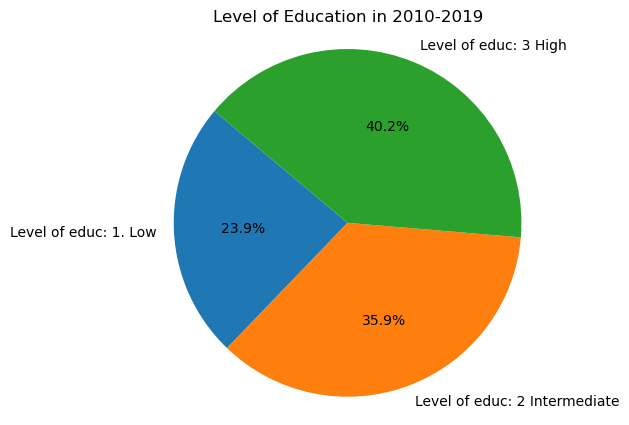

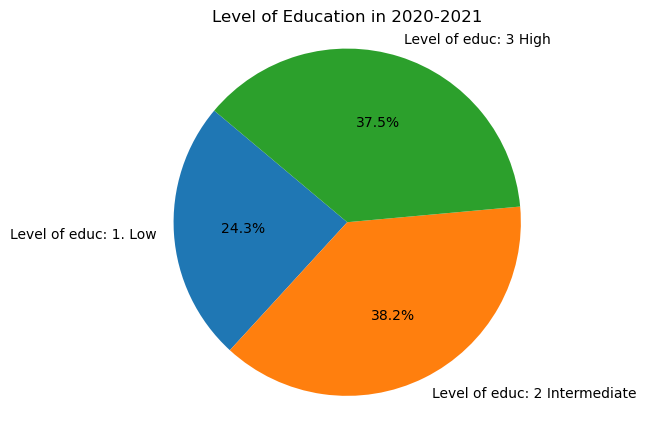

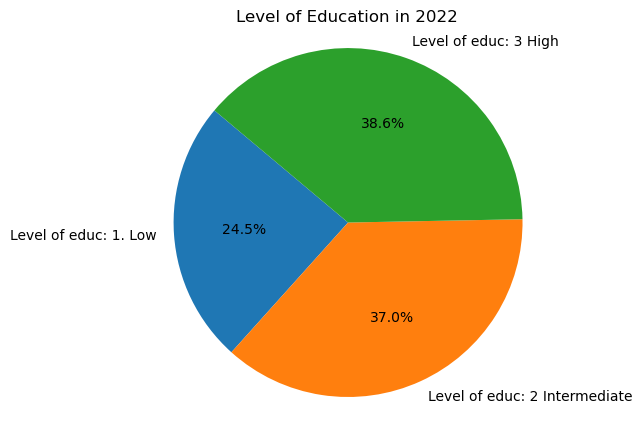

In [48]:
# create three categaries based on the periods
df_updated['Period'] = pd.cut(df_updated['Topic'], bins=[2009, 2019, 2021, 2022], labels=['2010-2019', '2020-2021', '2022'])
avg_data = df_updated.groupby(['Personal characteristics', 'Period'])['Use of public transport'].mean().reset_index()
avg_data
avg_data = avg_data.drop(avg_data[avg_data['Personal characteristics'] == 'Average'].index)
df_grouped = avg_data.groupby(['Period', 'Personal characteristics'])['Use of public transport'].sum().unstack().T

# create pie charts
periods = df_grouped.columns
for period in periods:
    data = df_grouped[period]
    labels = data.index
    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Level of Education in {period}')
    plt.axis('equal') 
    plt.show()

In [49]:
# create one histogram with an overview of the different periods
fig = px.bar(avg_data, x='Period', y='Use of public transport', color='Personal characteristics',
             barmode='group', labels={'Use of public transport': 'Average Use of Public Transport'},
             title="Use of Public Transport by Education Level for different periods")

fig.show()

In the covid period, the intermediate level of education used public transort more than the high level while it was the other way around before the pandemic. Reasons can be the different kind of jobs linked to the different level of education. \
It can be caused by the work-from-home culture during the pandemic. If higher educated jobs have more possibilities to work from home, they use less public transport compared to lower levels. \
These are the white collar workers, who have more opportunities to work from home then the blue collar workers. \
Although it is possible that work-from-home is still used after the pandemic (Smite et al., 2023), the charts show that higher education has a bigger part in the overall public transport the year after the pandemic. 
Possibly this is due to students returning to university. 

The lower education significantly use less public transport compared to higher education levels. \
A reason for this can be the different jobs connected to different kinds of education. Moreover, higher educated people tend to live in cities (Hoogopgeleiden, 2021 | Compendium Voor De Leefomgeving, n.d.), where PT is more convinient than on the countryside. 

### 5.3.5 Income and car ownership

In [50]:
# First we create a series named mask to indicate which values contain info about income 
mask = df['Personal characteristics'].str.startswith('Equi')
# Then the dataframe is made with this info 
df_income = df[mask]
# Lastly the dataframe is plotted
fig = px.line(df_income, y='Use of public transport', x='Topic', color='Personal characteristics')
fig.show()

In [51]:
# First we create a series named mask to indicate which values contain info about car ownership
mask = df['Personal characteristics'].str.startswith(('Driv','No'))
# Then the dataframe is made with this info 
df_drivers_licence = df[mask]
# Lastly the dataframe is plotted
fig = px.line(df_drivers_licence, y='Use of public transport', x='Topic', color='Personal characteristics')
fig.show()

Observations:
1. The lowest incomes travel significantly more by PT than all other groups.
2. The second 20%-group travelled least before COVID, but second most after COVID.
3. The highest incomes travelled second most before COVID, but least after COVID.
4. The mature population without driver licence or car in their household travel most with PT.
5. Before COVID people with a driver licence but without a car travelled more with PT than adults without a driver licence. Due to COVID the latter uses PT more than the former.
6. The drop due to COVID was the highest for people with a car and driver licence.
<br>

Paulley et al. (2006) identify four key relationships between income and public transport usage:

1. An increase in income will, depending upon the level of income, lead to an increase in car ownership and so car availability, or to an increase in public transport use.
2. An increase in car ownership/availability will, other things being equal, lead to a reduction in the demand for public transport modes.
3. The sign and magnitude of demand elasticities for public transport with respect to car availability and income will vary depending upon the income levels.
4. Income growth can be expected to increase average trip length.

Holmgren (2013) found that income's direct influence on public transport demand and income's indirect influence through car ownership work in opposite directions, so that the total income effect is close to zero. 

In the USA, poorer people live closer to city centers because of their dependency on cheap public transportation, while richer people can afford to travel by car to their work (Glaeser et al., 2008). Van Goeverden et al. (2006) state that also in the Netherlands low-income people may not be able to afford alternative transport and thus are dependent on public transportation.

MuConsult (1992) shows that train use in the Netherlands does increase with income, controlling for other variables such as car ownership, residential location, and educational level. Buehler and Pucher (2012) express that the lowest income percentile group travels the most with public transport, while the second, third, and fourth income groups have almost identical travel percentages.

During COVID, working from home was a privilege of higher-income jobs (Tirachini & Cats, 2020). Tirachini and Cats (2020) continue by stating that the amount of trips on public transportation fell by between 30% and 40% for people in the lowest income households, while the decrease in public transportation use was greater than 70% for the highest income households in their survey. Almlöf et al. (2021) also found that the higher the income, the higher the drop in public transport usage during the pandemic.

The investigated data supports the findings of the literature. The poor travel more by public transport. They started using PT faster after COVID than members of higher income groups, propably because they did not have the possiblity to work at home. 
Car ownership and driver licence ownerhip are negatively correlated with PT usage. People with a car in their household switched to the car during the pandemic and did not all return to PT after COVID. In the data we see that people without a driver licence returned faster to PT than people with a driver licence but without a car. Possibly that people with a driver licence have bought a car of use rent-a-car services more often.

# 6. Discussion

This study aimed to elucidate the relationship between the COVID-19 pandemic and public transport usage across various sociodemographic groups in the Netherlands from 2010 to 2022. The findings suggest a complex interplay between the pandemic's onset and changes in public transport patterns. Notably, a significant shift occurred in 2020, coinciding with the implementation of public health measures. A methodological shift in data collection in 2018 presented an analytical challenge, leading to a potential overestimation of public transport usage in that year. This necessitated a bifurcated analysis approach, comparing pre and post-COVID-19 data separately. Despite this limitation, the adjusted analysis revealed insightful trends. The pandemic's impact on public transport usage was not homogenous across all sociodemographic groups. Preliminary visualizations indicate that age and occupational status were particularly salient factors in transport pattern changes. For instance, the youth (ages 12-17) and working-age adults exhibited differing trends in public transport reliance, potentially reflecting shifts to remote education and work arrangements.

The findings resonate with the narrative presented by van der Drift et al. (2022) on changing mobility patterns in the Netherlands during the outbreak, which underscores the pandemic's transformative role in daily commutes. Similarly, the lifestyle changes documented by Van der Werf et al. (2021) during the pandemic's first wave provide a backdrop for understanding the broader societal shifts observed in our study. Given these insights, policymakers should consider tailored strategies for managing public transport systems during health crises, particularly focusing on the most affected demographic segments. Future research should aim to incorporate longitudinal data post-2022 to assess the persistence of these changes and evaluate the long-term implications for urban planning and public health policy. The collaborative effort of our research team was instrumental in conducting a comprehensive analysis. The division of labor, as outlined in the contribution statement, facilitated a multidisciplinary approach, combining data modeling, quantitative analysis, and robust visualizations to interpret complex datasets meaningfully.

# 7. Conclusion

# 8. Contribution Statement

**Martin Kooistra**: Introduction, Methodology, Education visualisation, Conclusion

**Suze Vernooij**: Data import and cleaning, 5.1 General impact COVID-19 on public transport use, 5.2 Key socio-demographic factors impacted by COVID-19, 5.3.3 Students with week or weekend pass public transport visualisation and analysation, structure of the report

**Jelmer Nederhof**: Income and car ownership; Trend analysis; narrative; references

**Yvain Redon**: Work on analysing the impact of age, code harmonization, parts of data processing.

**Author 5**:


# 9. References

## 9.1 Data used

- https://opendata.cbs.nl/#/CBS/en/dataset/84707ENG/table
- https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83496NED/table?ts=1696408326201



## 9.2 Literature 

- Almlöf, E., Rubensson, I., Cebecauer, M., & Jenelius, E. (2021). [Who continued traveling by public transport during COVID-19? Socioeconomic factors explaining travel behavior in Stockholm 2020 based on smart card data.](https://doi.org/10.1186/s12544-021-00488-0) European Transport Research Review, 13(1).
- Buehler, R., & Pucher, J. (2012). [Demand for public transport in Germany and the USA: An analysis of rider characteristics.](https://doi.org/10.1080/01441647.2012.707695) Transport Reviews, 32(5), 541–567.
- Glaeser, E. L., Kahn, M. E., & Rappaport, J. (2008). [Why do the poor live in cities? The role of public transportation.](https://doi.org/10.1016/j.jue.2006.12.004) Journal of Urban Economics, 63(1), 1–24.
- Haelermans, C., Huijgen, T., Jacobs, M., Levels, M., van der Velden, R., van Vugt, L., & van Wetten, S. (2020). [Using data to advance educational research, policy, and practice: Design, content, and research potential of the Netherlands Cohort Study on Education.](https://doi.org/10.1093/esr/jcaa027) European Sociological Review, 36(4), 643-662.
- Holmgren, J. (2013). [An analysis of the determinants of local public transport demand focusing the effects of income changes.](https://doi.org/10.1007/s12544-013-0094-0) European Transport Research Review, 5(2), 101–107.
- Hoogopgeleiden, 2021 | Compendium voor de leefomgeving. (n.d.). https://www.clo.nl/indicatoren/nl210013-opleidingsniveau-bevolking#:~:text=Utrecht%20is%20met%20voorsprong%20de,vervuld%20door%20Nijmegen%20(50%25).
- Koehl, A. (2020). [Urban transport and COVID-19: challenges and prospects in low- and middle-income countries.](https://doi.org/10.1080/23748834.2020.1791410) Cities & Health, 5(sup1), S185–S190.
- MuConsult. (1992). [Inkomen en treingebruik naar motief [Income and Train Use by Trip Purpose]](https://www.example.com). Amersfoort: MuConsult.
- Paulley, N., Balcombe, R. J., Mackett, R., Titheridge, H., Preston, J., Wardman, M., Shires, J., & White, P. (2006). [The demand for public transport: The effects of fares, quality of service, income and car ownership.](https://doi.org/10.1016/j.tranpol.2005.12.004) Transport Policy, 13(4), 295–306.
- Shadmi, E., Chen, Y., Dourado, I., Faran-Perach, I., Furler, J., Halmai, P., Hanvoravongchai, P., Obando, C., Petrosyan, V., Rao, K. D., Ruano, A. L., Shi, L., De Souza, L. E., Spitzer-Shohat, S., Sturgiss, E., Suphanchaimat, R., Uribe, M. V., & Willems, S. (2020). [Health equity and COVID-19: global perspectives.](https://doi.org/10.1186/s12939-020-01218-z) International Journal for Equity in Health, 19(1).
- Smite, D., Moe, N. B., Hildrum, J., Gonzalez-Huerta, J., & Mendez, D. (2023). [Work-from-home is here to stay: Call for flexibility in post-pandemic work policies.](https://doi.org/10.1016/j.jss.2022.111552) Journal of Systems and Software, 195, 111552.
- Tirachini, A., & Cats, O. (2020). [COVID-19 and public transportation: current assessment, prospects, and research needs.](https://doi.org/10.5038/2375-0901.22.1.1) Journal of Public Transportation, 22(1).
- Ton, D., Arendsen, K., De Bruyn, M., Severens, V., Van Hagen, M., Van Oort, N., Duives, N. (2022) [Teleworking during COVID-19 in the Netherlands: Understanding Behaviour, Attitudes, and Future Intentions of Train Travellers.](https://doi.org/10.1016/j.tra.2022.03.019) Transportation Research Part A: Policy and Practice, 159, 55‑73.
- van der Drift, S., Wismans, L., & Olde Kalter, M. J. (2022). [Changing mobility patterns in the Netherlands during COVID-19 outbreak.](https://doi.org/10.1080/17489725.2021.1876259) Journal of location based services, 16(1), 1-24.
- Van der Werf, E. T., Busch, M., Jong, M. C., & Hoenders, H. R. (2021). [Lifestyle changes during the first wave of the COVID-19 pandemic: a cross-sectional survey in the Netherlands.](https://doi.org/10.1186/s12889-021-11264-z) BMC Public Health, 21(1), 1226.
- Van Goeverden, C., Rietveld, P., Koelemeijer, J., & Peeters, P. (2006). [Subsidies in public transport.](https://www.openstarts.units.it/bitstream/10077/5892/1/vanGoeverden_et_al_ET32.pdf) European Transport, 32(32), 5–25.
- Wolbers, M. H. (2000). [The effects of level of education on mobility between employment and unemployment in the Netherlands.](https://doi.org/10.1093/esr/16.2.185) European Sociological Review, 16(2), 185-200.
